**Что делать**

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [55]:
df_player_data = pd.read_csv('C:/Users/anton/Documents/NETOLOGY/Courses/Python/Homework/nba-players-stats/player_data.csv')
print(df_player_data.shape)

(4550, 8)


In [56]:
df_player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [57]:
df_players = pd.read_csv('C:/Users/anton/Documents/NETOLOGY/Courses/Python/Homework/nba-players-stats/Players.csv')
print(df_players.shape)

(3922, 8)


In [58]:
df_players.head(3)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN


In [59]:
df_seasons_stats = pd.read_csv('C:/Users/anton/Documents/NETOLOGY/Courses/Python/Homework/nba-players-stats/Seasons_Stats.csv')
print(df_seasons_stats.shape)

(24691, 53)


In [60]:
df_seasons_stats.head(3)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0


## График 1: ТОП-10 стран-экспортёров спортсменов в NBA

In [61]:
us_states = [
"Alabama",
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"Delaware",
"District of Columbia",
"Florida",
"Georgia",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Montana",
"Nebraska",
"Nevada",
"New Hampshire",
"New Jersey",
"New Mexico",
"New York",
"North Carolina",
"North Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Pennsylvania",
"Rhode Island",
"South Carolina",
"South Dakota",
"Tennessee",
"Texas",
"Utah",
"Vermont",
"Virginia",
"Washington",
"West Virginia",
"Wisconsin",
"Wyoming"]

In [62]:
def country_row (row):
    if row['birth_state'] in us_states:
        return 'USA'
    else:
        return row['birth_state']

In [63]:
df_players['birth_country'] = df_players.apply(country_row, axis =1)

In [64]:
df_players_gr = df_players[['birth_country','Player']].groupby('birth_country').count().sort_values(by='Player', ascending=False)

In [65]:
df_players_indexed = df_players_gr.reset_index().sort_values('Player', ascending=False)
filtered_df_players_indexed = df_players_indexed[ (df_players_indexed['birth_country']!='USA')].head(10)
filtered_df_players_indexed

,birth_country,Player
1,Canada,26
2,Serbia,20
3,France,19
4,Germany,17
5,Croatia,16
6,Brazil,15
7,Spain,14
8,Australia,13
9,Argentina,12
11,Bosnia and Herzegovina,11


Text(22.5, 0.5, 'Most huge exporter')

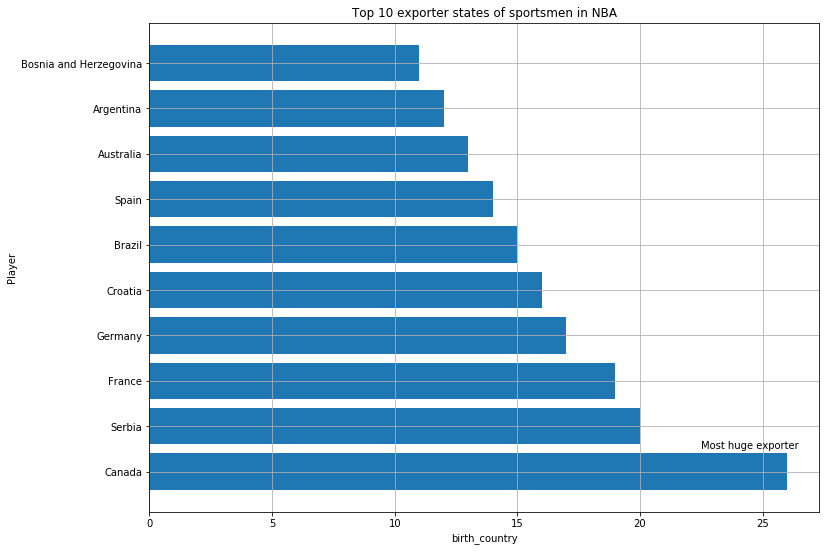

In [66]:
plt.barh(filtered_df_players_indexed['birth_country'], filtered_df_players_indexed['Player'])
plt.xlabel('birth_country')
plt.ylabel('Player')
plt.title('Top 10 exporter states of sportsmen in NBA')
plt.grid()
plt.text(22.5, 0.5, 'Most huge exporter')

### Примечание: 
Всего два типа переменных - integer и string.
Цель диаграммы - определить родину большинства иностранных спортсменов НБА.
Данный тип диаграммы наиболее прост для визуализации рейтинга из двух параметров, в котором можно без потери доступности восприятия увеличить или уменьшить диапазон данных.

## График 2: Какие показатели сильно коррелируют между собой?

In [14]:
import seaborn as sns

In [15]:
df_seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [16]:
df_seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [17]:
# list(df_seasons_stats.columns.values)

C:\Users\anton\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\anton\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


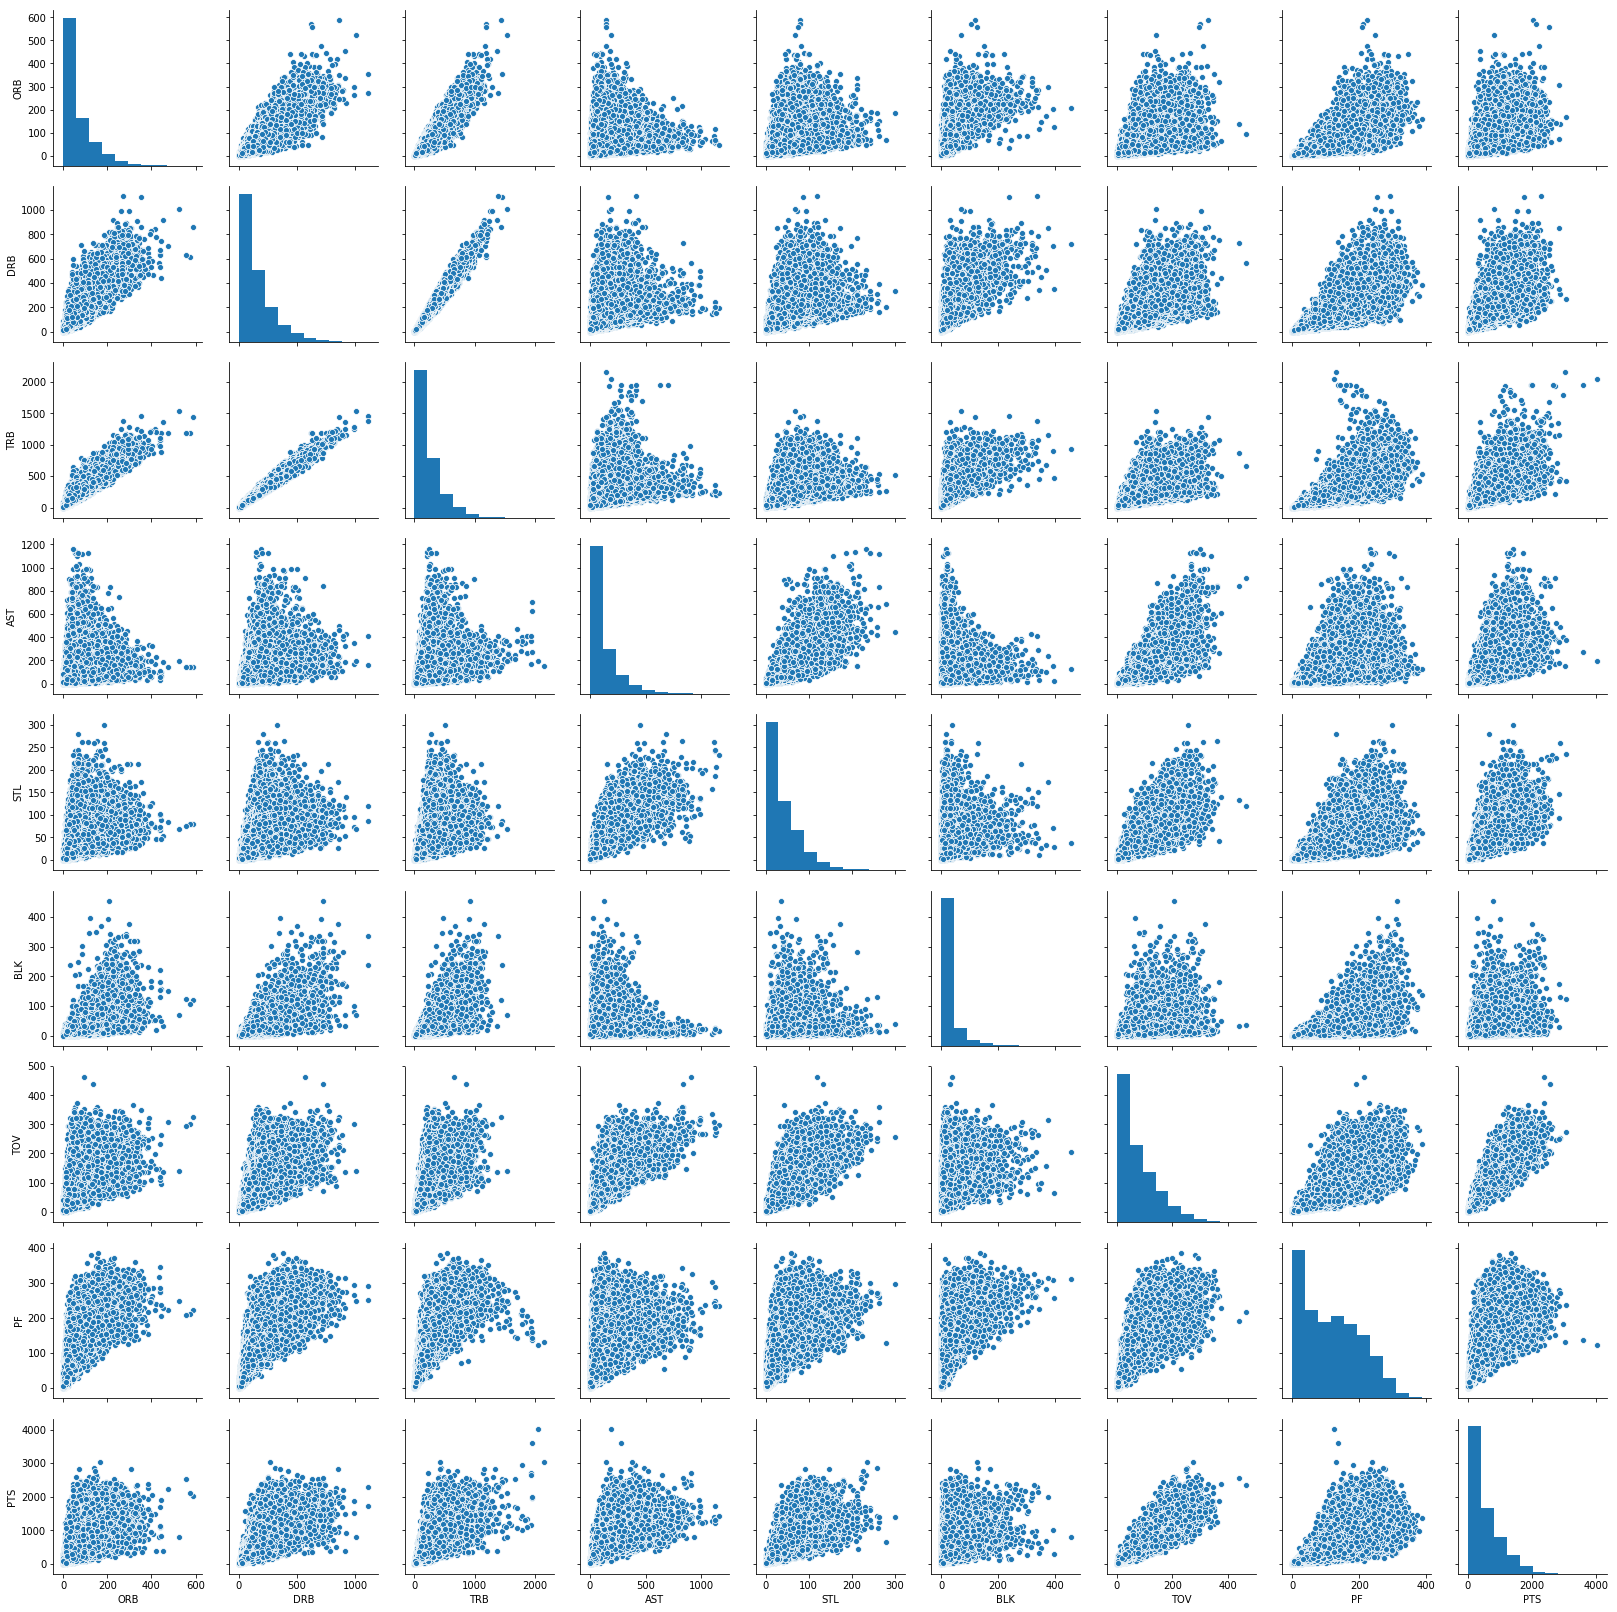

In [18]:
sns_plot = sns.pairplot(
    df_seasons_stats[[
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']]);
sns_plot

### Примечание:
На графиках выше видно, как одни показатели коррелируют с другими. Среди всех интересная зависимость между потерями и очками, которые имеют сильную корреляцию с единичными выбросами.

## График 3: Какие показатели сильно коррелируют между собой?

In [19]:
df_PTS = df_seasons_stats.PTS.dropna()

C:\Users\anton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


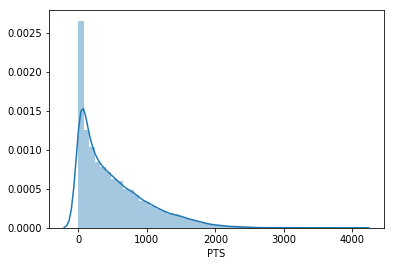

In [20]:
sns.distplot(df_PTS)

In [21]:
df_seasons_stats.PTS.max()

4029.0

### Примечание:
Респределение набранных спортсменами очков за период исследований показывает,
что большее число личных результатов спортсменов равняется нулю.
Единичные же достижения спортсменов превышают оценку 2000 и достигают максимальным значением 4029.

## График 4: Подробное графическое сравнение взаимосвязи показателей потерь мяча в матчах и набранных спорстменами очков.

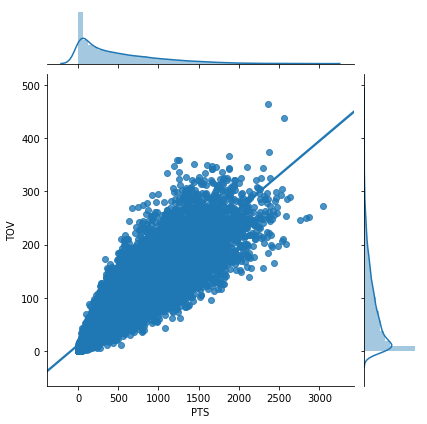

In [22]:
sns.jointplot(x='PTS', y='TOV', 
              data=df_seasons_stats, kind='reg')

### Примечание:
Два показателя имеют сильную корреляцию. 
Наибольшая плотность показателей находится у нулевых отметок, и большее же распределение показателей с выбросами приходит
на область выше отметки (2000; 250).

## График 5: Сравнение распределения набранных очков у спортсменов из 10 старн - крупнейших поставщиков баскетболистов в NBA

In [77]:
joined_pl_s_stat = df_seasons_stats.merge(df_players, on='Player', how='left')

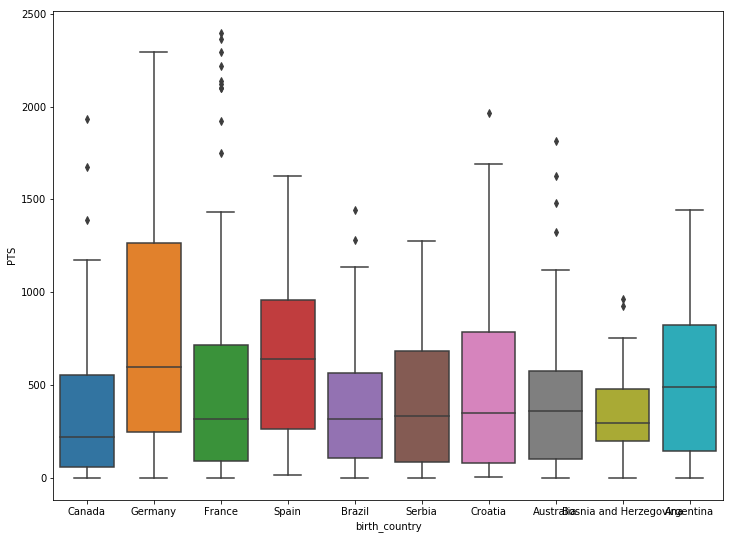

In [78]:
sns.boxplot(x="birth_country", y="PTS", 
            data=joined_pl_s_stat[joined_pl_s_stat.birth_country.isin(filtered_df_players_indexed["birth_country"])])

### Примечание:
Самые многочисленные в NBA спорсмены из Канады являются наименее результативными в большинстве своих достижений.
Самые же результативными спортсменами являются баскетболисты из Испании, у которых 75% достижений выше,
чем аналогичный результат спортсменов из других стран.